# 데이터 전처리

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

**두 리스트 열방향으로 합치기: 2차원 배열로**
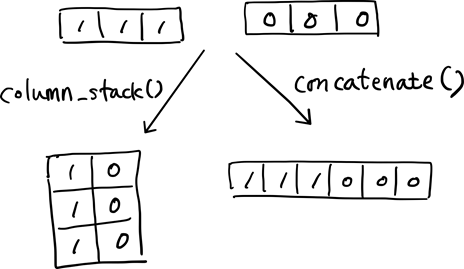

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


**라벨 데이터**

In [5]:
# [1]*35 + [0]*14
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [6]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 데이터와 테스트 데이터 나누기
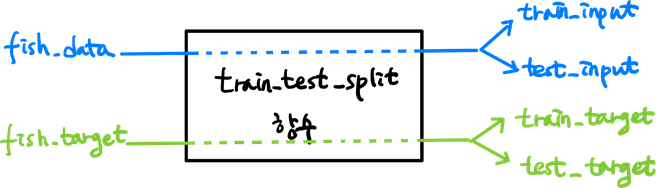

In [7]:
from sklearn.model_selection import train_test_split

**train_test_split(매개변수들)**
- *array : feature dataset, label dataset 
- test_size = None 
- train_size = None
- shuffle = True
- stratify = None
- random_state = None

Stratified sampling은 Random sampling과는 다른 샘플링 방식이다. **Stratified sampling는 훈련데이터를 나눌 때 무작위로 샘플링을 하되, original dataset의 클래스 비율이 train, test set에서도 동일하게 유지되는 것을 보장한다는 점이 Random sampling과의 차이점이다.** 위 CONDITIONS 섹션에서도 말했듯이, 분류문제에서는 이 비율이 유지되는 것이 굉장히 중요한데, original dataset에서 특정 클래스 비율이 불균형한 경우 stratify 매개변수에 타깃 데이터를 지정하여 호출하면 (어떠한 통계적 기법을 통해서) 이 비율이 유지될 수 있도록 샘플링한다. 

⑤ random_state = 42

train_test_split()는 데이터를 무작위로 섞은 뒤, 데이터 셋을 나눈다. 그래서 함수를 호출할 때마다 다른 결과로 분할이 되는데, random_state를 특정 숫자로 지정하면 항상 동일하게 분할할 수 있다. 실제 상황에서는 거의 필요 없지만, 다른 사람들과 결과를 공유해야하거나 실험결과를 똑같이 재현해야 할 때는 유용하게 쓰인다.

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                                                      fish_target,
                                                                      random_state=42)

In [9]:
test_input.shape

(13, 2)

In [10]:
train_target.shape

(36,)

In [11]:
import pandas as pd
print(pd.Series(fish_target).value_counts())
print(pd.Series(test_target).value_counts())

1.0    35
0.0    14
dtype: int64
1.0    10
0.0     3
dtype: int64


**데이터 분포를 명시적으로 반영시킨 분할**

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                                                      fish_target,
                                                                      stratify=fish_target,
                                                                      random_state=42)

In [13]:
print(pd.Series(fish_target).value_counts())
print(pd.Series(test_target).value_counts())

1.0    35
0.0    14
dtype: int64
1.0    9
0.0    4
dtype: int64


## 성능 평가 및 테스트

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

### 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?
- 대략의 데이터로 봤을 때 도미로 판단
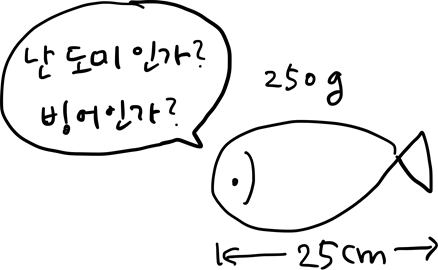

In [15]:
print(kn.predict([[25,150]]))

[0.]


C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- **빙어로 예측함. 이유는???**

- 빙어로 예측한 이유 찾아보기
    - **테스트할 도미 데이터를 포함한 산점도**

In [16]:
import matplotlib.pyplot as plt

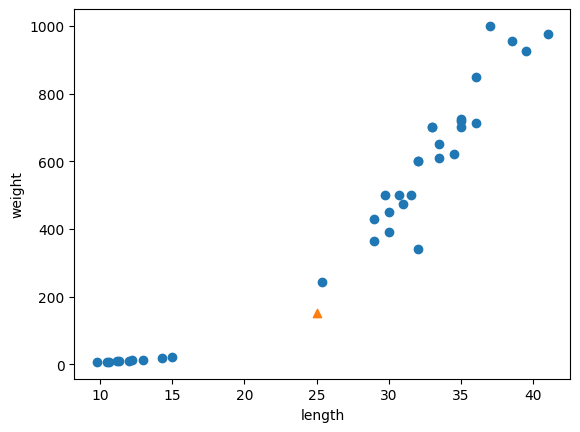

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**테스트할 도미데이터와 이웃하는 데이터들**

In [18]:
# kn.n_neighbors=5 가 기본 값
# kn.kneighbors()는 입력되는 데이터와 가장 거리가 가까운 이웃들에 대한 정보를 반환
# dist : 가까운 이웃과의 거리, idx : 가까운 이웃의 index가 나옴
dist, idx = kn.kneighbors([[25,150]])

In [19]:
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [20]:
print(idx)

[[21 33 19 30  1]]


In [21]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

Text(0, 0.5, 'weight')

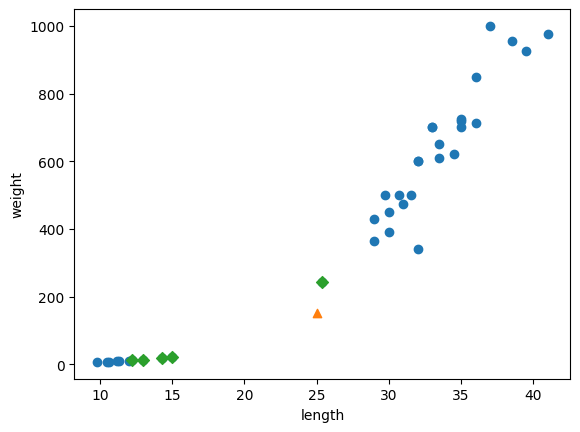

In [22]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[idx,0],train_input[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [23]:
print(train_target[idx])

[[1. 0. 0. 0. 0.]]


- 이웃에 도미가 하나밖에 포함되지 않음

In [24]:
# 거리 확인
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- 이런 결과가 나온 이유는??????
    - 길이와 무게가 1대1로 모델에 반영되려면 크기가 비슷해야 하는데, 길이에 비해 무게가 크기가 너무 커서 길이와 무게가 다른 비율로 반영되어 버림
    - 아래 이미지를 보면 거리 92에 비해서 130은 너무 먼거리 임
        - 130에 비해서 92가 상대적을 너무 짧음
    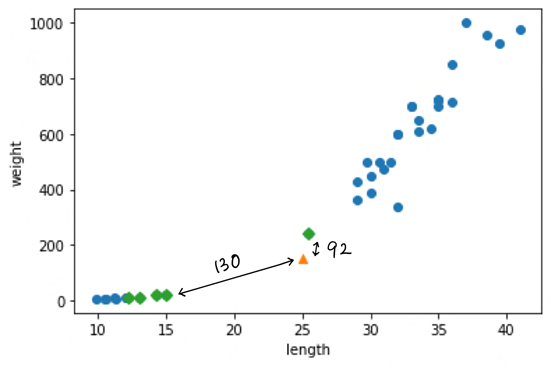

## 기준을 맞춰라
- x축의 범위를 0~1000 으로

Text(0, 0.5, 'weight')

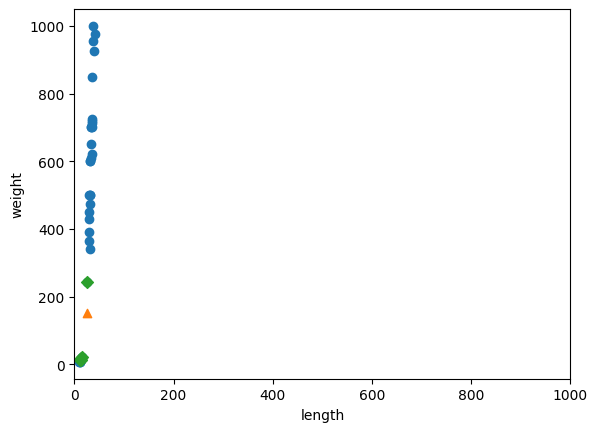

In [25]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[idx,0],train_input[idx,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')

- 범위를 같게 하고 그래프를 확인하니 길이는 거의 반영이 안됨
    - 오로지 무게만 고려 대상이 되는 것 같음

- 최근접이웃 알고리즘은 거리를 기반으로 가까운 이웃을 결정
- 거리 계산 시 자료의 값이 큰 변수에 더 큰 영향을 받게 됨
    - 스케일(범위)을 같은 기준으로 맞춰줘야 함

### 두 변수의 스케일을 갖게
- 표준점수(Z-Score)
    - 평균은 0 표준편차는 1로 만든다

- 표준 점수는 통계학적으로 정규분포를 만들고 개개의 경우가 표준편차상에 어떤 위치를 차지하는지를 보여주는 차원없는 수치이다. 
- 표준값, Z값, Z 점수이라고도 한다. 
- 학력고사 등의 평가에서 개개인의 성적이 전체에서 어떤 위치를 차지하는지를 보여주기 위해 쓰이기도 한다.
- 원점수 - 평균 / 표준편차
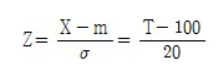

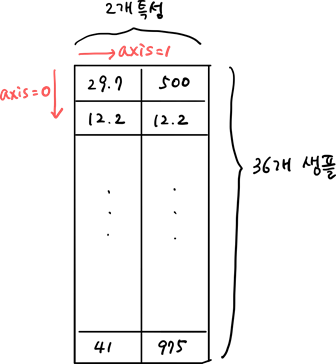

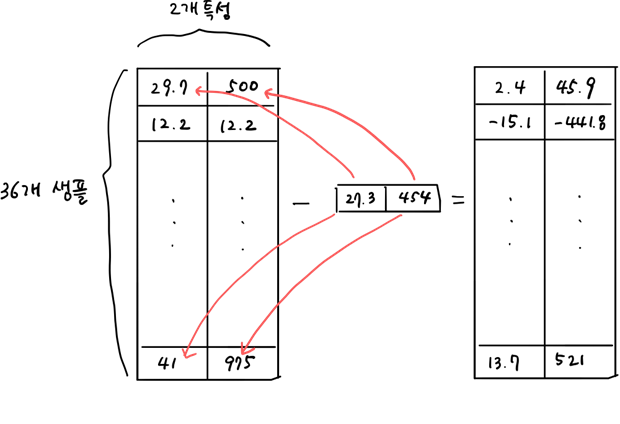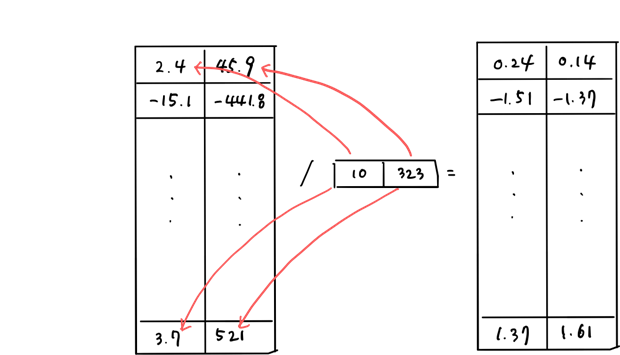

In [26]:
# 특성의 평균
mean = np.mean(train_input, axis=0)
print(mean)

[ 27.29722222 454.09722222]


In [27]:
std = np.std(train_input, axis=0)
print(std)

[  9.98244253 323.29893931]


In [28]:
train_input[:10]

array([[ 29.7, 500. ],
       [ 12.2,  12.2],
       [ 33. , 700. ],
       [ 11.3,   8.7],
       [ 39.5, 925. ],
       [ 29. , 430. ],
       [ 36. , 714. ],
       [ 36. , 850. ],
       [ 31. , 475. ],
       [ 35. , 720. ]])

In [29]:
train_scaled = (train_input-mean) / std
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


Text(0, 0.5, 'weight')

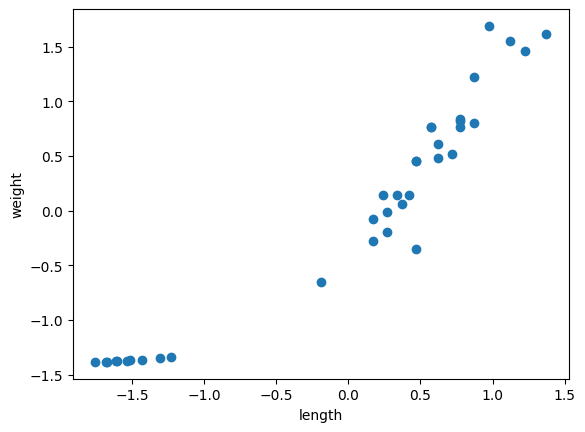

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')

# x축과 y축의 범위가 같아짐

### 전처리 데이터로 모델 훈련하기

Text(0, 0.5, 'weight')

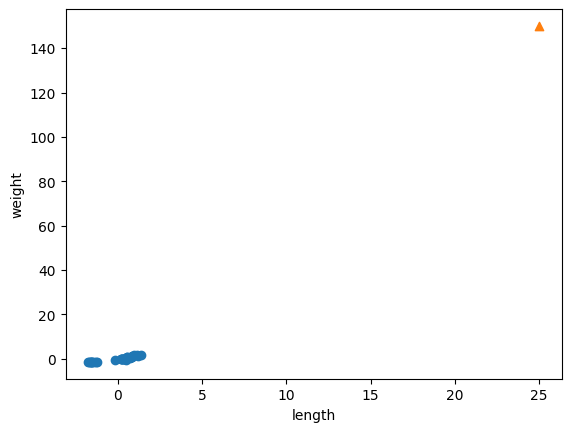

In [31]:
# 스케일된 학습데이터와 일반 테스트 데이터를 비교하면 크기가 다름
# 테스트 데이터도 스케일링 해야 함
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')

**테스트 데이터도 스케일링**

In [32]:
# 학습데이터 생성할 때 썼던 평균과 표준편차를 그대로 이용해야 함
new = ([25,150]-mean)/std
print(new)

[-0.23012627 -0.94060693]


Text(0, 0.5, 'weight')

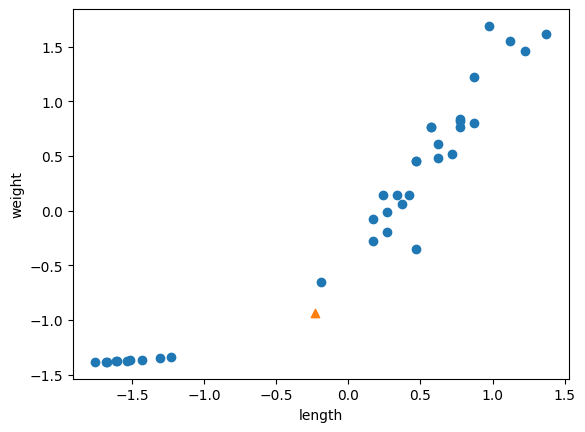

In [33]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [34]:
# 스케일링된 데이터로 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [35]:
# 성능평가
# 테스트데이터도 스케일링 진행해야 함
# 테스트데이터의 스케일링은 학습데이터의 평균과 표준편차를 사용해야 함
test_input[:10]
test_scaled = (test_input-mean)/std

In [36]:
kn.score(test_scaled, test_target)

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [37]:
kn.predict([new])
# new : [-0.23012627 -0.94060693]

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1.])

In [38]:
dist,idx = kn.kneighbors([new])
print(dist,idx)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


Text(0, 0.5, 'weight')

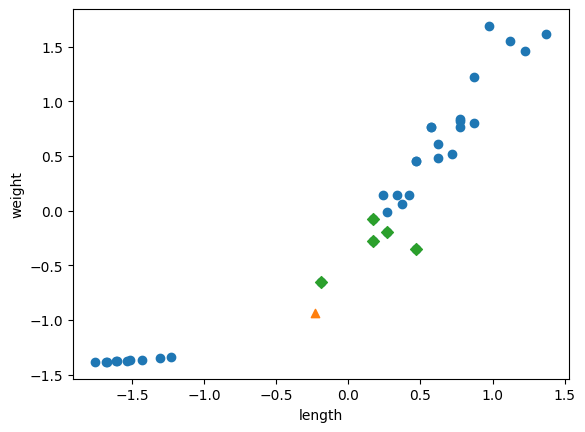

In [39]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

- 스케일링 후 예측을 진행하니 가까운  데이터에 모두 도미가 들어옴
    - 도미로 판단

### 알고리즘에 따라서 특성값의 차이가 잘못된 성능을 타나낼 수 있음
- 표준화등을 통해서 스케일링을 진행하는 것이 일반적